In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [60]:
# Load dataset
teams_df = pd.read_csv("../data/teams.csv")
teams_df.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum


In [61]:
# Drop unnecessary columns
teams_df = teams_df.drop(["rank", "seeded", "lgID", "tmID", "franchID", "confID", "divID", "name", "arena", "firstRound", "semis", "finals"], axis=1)

# Convert "playoff" column to binary (Y: 1, N: 0)
teams_df["playoff"] = teams_df["playoff"].map({"Y": 1, "N": 0})

teams_df.head()

,year,playoff,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend
0,9,0,895,2258,542,725,202,598,340,737,...,30,34,1,16,3,14,2,18,6825,141379
1,10,1,1089,2428,569,755,114,374,404,855,...,16,34,12,5,6,11,10,12,6950,120737
2,1,0,812,1903,431,577,131,386,305,630,...,24,32,5,11,3,13,5,16,6475,90963
3,2,1,746,1780,410,528,153,428,309,639,...,14,32,11,5,7,9,15,6,6500,105525
4,3,1,770,1790,490,663,211,527,302,653,...,14,32,11,5,7,9,12,9,6450,106670


In [63]:
# Split dataset in features and target variable

# Create and train model
model = DecisionTreeClassifier(random_state=42)

min_year = 7
max_year = teams_df['year'].max()

print(min_year, max_year)

for i in range(min_year, max_year + 1):
    teams_df_train = teams_df[teams_df['year'] < i]
    teams_df_test = teams_df[teams_df['year'] == i]

    X_train = teams_df_train.drop("playoff", axis=1) # Features
    y_train = teams_df_train["playoff"] # Target variable

    X_test = teams_df_test.drop("playoff", axis=1) # Features
    y_test = teams_df_test["playoff"] # Target variable

    print(f"Train/Test size for year={i}:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    model.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = model.predict(X_test)

    print(f"\nyear={i}, Accuracy:", accuracy_score(y_test, y_pred))
    print(f"\nyear={i}, Classification Report:\n", classification_report(y_test, y_pred))
    print(f"\nyear={i}, Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

7 10
Train/Test size for year=7: (88, 48) (14, 48) (88,) (14,)

year=7, Accuracy: 0.8571428571428571

year=7, Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.88      0.88      0.88         8

    accuracy                           0.86        14
   macro avg       0.85      0.85      0.85        14
weighted avg       0.86      0.86      0.86        14


year=7, Confusion Matrix:
 [[5 1]
 [1 7]]
Train/Test size for year=8: (102, 48) (13, 48) (102,) (13,)

year=8, Accuracy: 0.7692307692307693

year=8, Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.62      0.77         8

    accuracy                           0.77        13
   macro avg       0.81      0.81      0.77        13
weighted avg       0.86      0.77      0.77        13


year=8, Confusion Matrix:
 [[5 0]
 [3

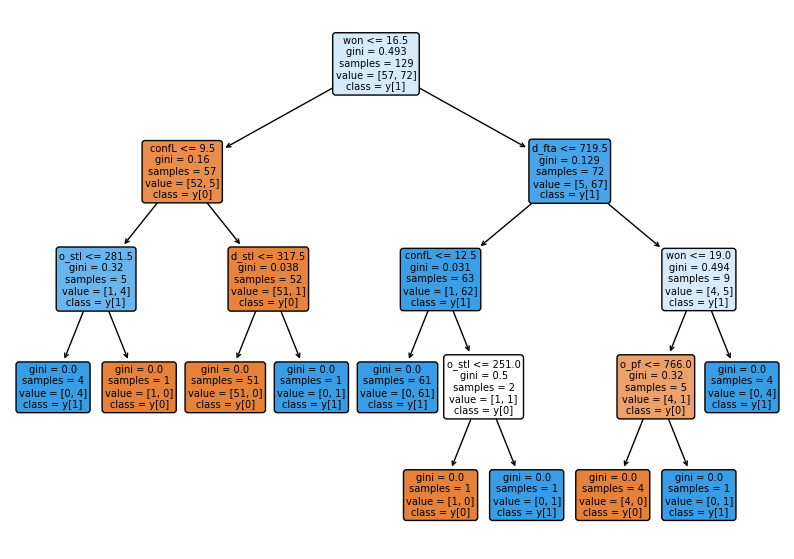

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()
